In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='ticks')

# Importing the data file 

In [2]:
Sales=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/Case Study 4 - Python Visualizations Case Study/SalesData.csv')

In [3]:
Sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [4]:
Sales.isna().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

In [5]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [6]:
# Replacing negative values by 0 in Sales2015 and Sales2016 columns
Sales['Sales2015']=np.where(Sales.Sales2015<0,0, Sales.Sales2015)
Sales['Sales2016']=np.where(Sales.Sales2016<0,0, Sales.Sales2016)

# 1. Compare Sales by region for 2015 and 2016 using bar chart. 

In [7]:
Sales.Sales2015=Sales.Sales2015.astype(int)

In [8]:
Sales.Sales2016=Sales.Sales2016.astype(int)

In [9]:
region_sales=Sales.groupby('Region')[['Sales2015','Sales2016']].sum()

In [10]:
region_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Central to West
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sales2015  3 non-null      int32
 1   Sales2016  3 non-null      int32
dtypes: int32(2)
memory usage: 48.0+ bytes


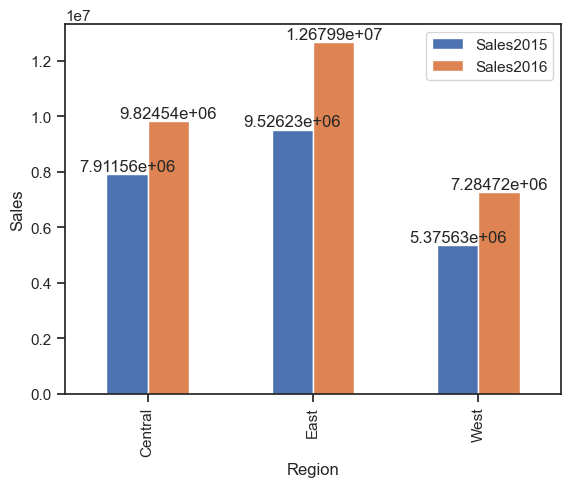

In [11]:
ax=region_sales.plot(kind='bar', ylabel='Sales')

for i in ax.containers:
    ax.bar_label(i,)

# 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie chart. 

<Axes: ylabel='Sales2016'>

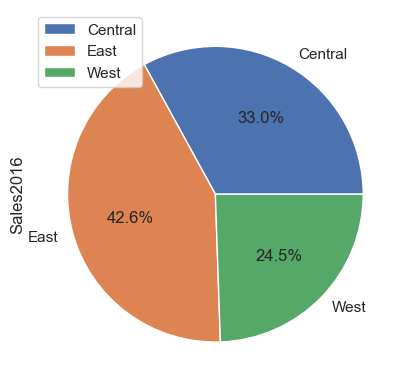

In [12]:
region_sales.plot(kind='pie', y='Sales2016', autopct='%.1f%%')

# 3. Comparee total sales of 2015 and 2016 with respect to Region and Tiers. 

In [13]:
region_tier=Sales[['Region','Tier','Sales2015','Sales2016']].groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum()

In [14]:
region_tier.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, ('Central', 'High') to ('West', 'Out')
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sales2015  12 non-null     int32
 1   Sales2016  12 non-null     int32
dtypes: int32(2)
memory usage: 284.0+ bytes


Text(0, 0.5, 'Sales')

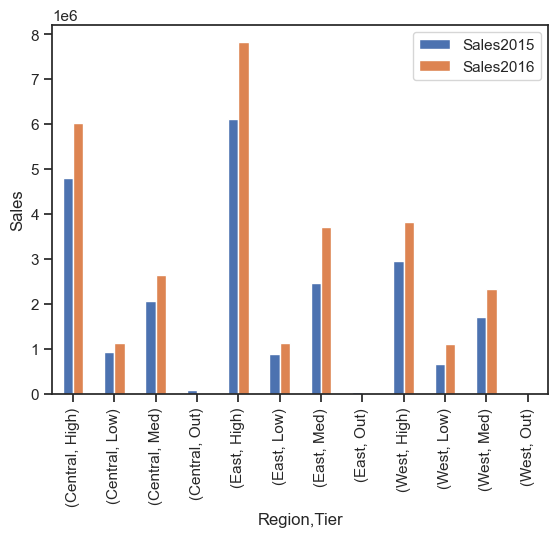

In [15]:
region_tier.plot(kind='bar')
plt.ylabel('Sales')

# 4. In the East region, which state registered a decline in 2016a scompared to 2015?

In [16]:
Sales.State.unique()

array(['AZ', 'CT', 'MA', 'ME', 'NJ', 'NY', 'PA', 'WV', 'OH', 'MD', 'DC',
       'VA', 'NC', 'SC', 'GA', 'AL', 'FL', 'TN', 'MS', 'LA', 'KY', 'IN',
       'IL', 'MI', 'IA', 'SD', 'WI', 'MN', 'WA', 'ID', 'MO', 'KS', 'NE',
       'CO', 'AR', 'OK', 'TX', 'UT', 'CA', 'NM', 'OR', 'RI', 'NV', 'NH'],
      dtype=object)

In [17]:
east=Sales[Sales.Region=='East'].groupby('State')[['Sales2015','Sales2016']].sum()

In [18]:
east=east.reset_index(drop=False)

<Axes: xlabel='Sales', ylabel='State'>

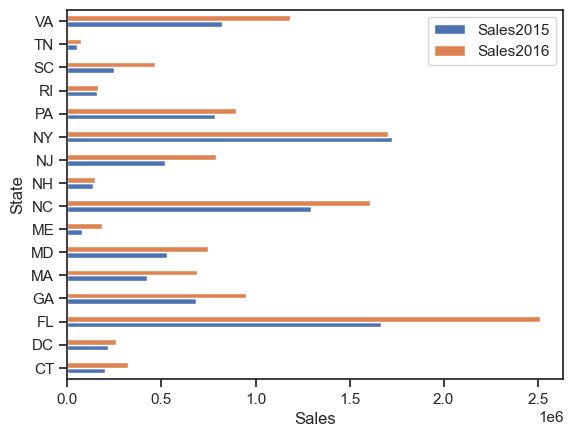

In [19]:
east.plot(kind='barh', x='State', y=['Sales2015', 'Sales2016'], xlabel='Sales')

In East region, NY recorded a decline in sales in 2016 in comparison to 2015.

# 5. In all the high Tier, which division saw a decline in number of units sold in 2016 compared to 2015?

In [20]:
Sales.Tier.unique()

array(['Low', 'Med', 'High', 'Out'], dtype=object)

In [21]:
Sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0,13208,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500,23114,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0,6627,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881,13254,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684,0,1.0,0.0,1.02,1.53


In [22]:
tier_units=Sales[Sales.Tier=='High'].groupby('Division')[['Units2015','Units2016']].sum()

In [23]:
tier_units=tier_units.reset_index(drop=False)

<Axes: ylabel='Division'>

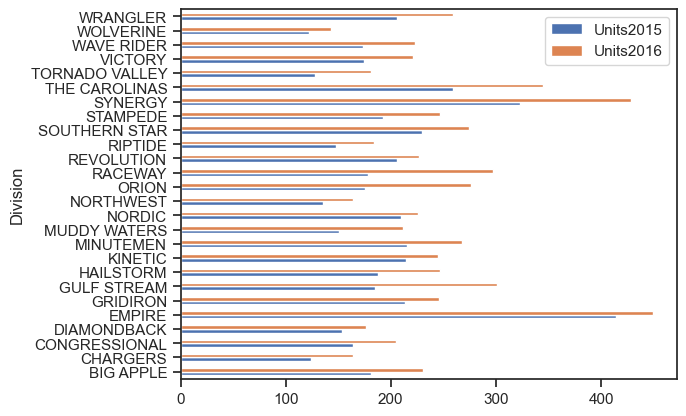

In [24]:
tier_units.plot(kind='barh', x='Division',y=['Units2015','Units2016'])

There is no Division, where a decline in units sold in 2016 compared to 2015 in all the high tiers.

# 6. Create a new column Qtr using np.where() or any suitable utiity in the imported dataset. The quarters are based on months and defined as -
1. Jan- Mar: Q1
2. Apr- Jun: Q2
3. Jul- Sep: Q3
4. Oct- Dec: Q4

In [25]:
Sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0,13208,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500,23114,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0,6627,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881,13254,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684,0,1.0,0.0,1.02,1.53


In [26]:
Q1=['Jan', 'Feb', 'Mar']
Q2=['Apr','May','Jun']
Q3=['Jul','Aug','Sep']

In [27]:
Sales['Qtr']=np.where(Sales.Month.isin(Q1), 'Q1', np.where(Sales.Month.isin(Q2), 'Q2', np.where(Sales.Month.isin(Q3), 'Q3','Q4')))

In [28]:
Sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0,13208,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500,23114,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0,6627,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881,13254,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684,0,1.0,0.0,1.02,1.53,Q3


# 7. Compare Qtr wise sales in 2015 and 2016 in bar plot.

In [29]:
qtr_sales=Sales.groupby('Qtr')[['Sales2015','Sales2016']].sum()

In [30]:
qtr_sales=qtr_sales.reset_index(drop=False)

<Axes: xlabel='Qtr', ylabel='Sales'>

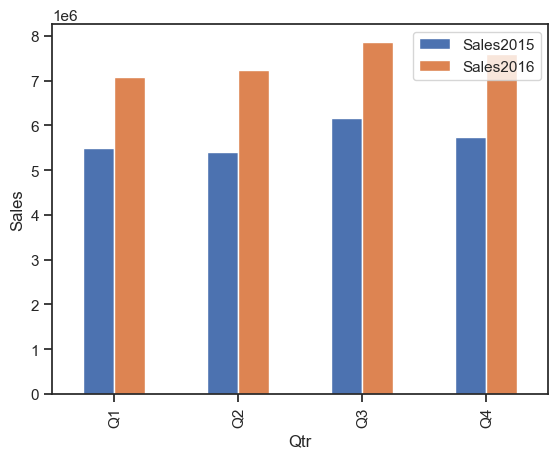

In [31]:
qtr_sales.plot(x='Qtr', y=['Sales2015','Sales2016'], kind='bar', ylabel='Sales')

# 8. Determine the composition of Qtr wise sales in 2016 with regard to all the Tiers in a pie chart.

    (Draw 4 pie charts representing a Quarter for each other)

In [32]:
q1=Sales[Sales.Qtr=='Q1'].groupby('Tier')['Sales2016'].sum()
q2=Sales[Sales.Qtr=='Q2'].groupby('Tier')['Sales2016'].sum()
q3=Sales[Sales.Qtr=='Q3'].groupby('Tier')['Sales2016'].sum()
q4=Sales[Sales.Qtr=='Q4'].groupby('Tier')['Sales2016'].sum()

In [33]:
q3

Tier
High    4875247
Low      797352
Med     2196942
Out           0
Name: Sales2016, dtype: int32

<Axes: title={'center': 'Q4'}, ylabel='Sales2016'>

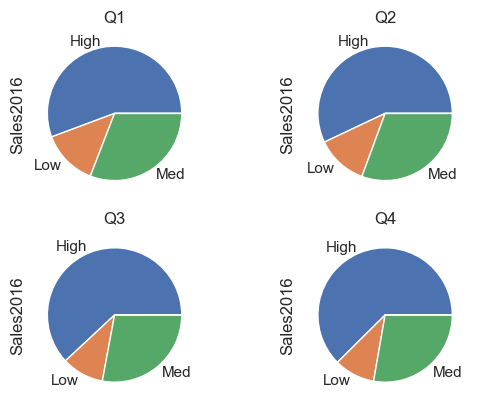

In [34]:

plt.subplot(2,2,1)
q1.plot(kind='pie', y='Sales2016', title='Q1')
plt.subplot(2,2,2)
q2.plot(kind='pie', y='Sales2016', title='Q2')
plt.subplot(2,2,3)
q3.plot(kind='pie', y='Sales2016', title='Q3')
plt.subplot(2,2,4)
q4.plot(kind='pie', y='Sales2016', title='Q4')


# Thank You!